In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [3]:
dir = os.getcwd()
fx = pd.read_csv(dir+'/data/fx.csv')

In [4]:
fx.head(
)

,통계표,계정항목,측정항목,단위,변환,2003/01,2003/02,2003/03,2003/04,2003/05,...,2024/09,2024/10,2024/11,2024/12,2025/01,2025/02,2025/03,2025/04,2025/05,2025/06
0,"3.1.2.3. 원화의 대미달러, 원화의 대위안/대엔 환율",원/달러(종가 15:30),평균자료,원,원자료,"1,178.38","1,191.95","1,236.66","1,230.54","1,199.66",...,"1,332.76","1,365.37","1,394.32","1,436.78","1,455.50","1,445.58","1,457.92","1,441.92","1,390.70","1,365.15"
1,"3.1.2.3. 원화의 대미달러, 원화의 대위안/대엔 환율",원/달러(종가 15:30),말일자료,원,원자료,"1,170.10","1,193.70","1,254.60","1,215.30","1,205.90",...,"1,307.80","1,379.90","1,394.70","1,472.50","1,452.70","1,463.40","1,472.90","1,421.00","1,380.10","1,350.00"


In [5]:
fx.columns

Index(['통계표', '계정항목', '측정항목', '단위', '변환', '2003/01', '2003/02', '2003/03',
       '2003/04', '2003/05',
       ...
       '2024/09', '2024/10', '2024/11', '2024/12', '2025/01', '2025/02',
       '2025/03', '2025/04', '2025/05', '2025/06'],
      dtype='object', length=275)

In [6]:
drops = ['통계표', '계정항목', '측정항목', '단위', '변환']
fx.drop(columns=drops, inplace=True)

In [8]:
fx = fx.T

In [9]:
cols = ['avg', 'close']
fx.columns = cols

In [11]:
fx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 2003/01 to 2025/06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   avg     270 non-null    object
 1   close   270 non-null    object
dtypes: object(2)
memory usage: 14.4+ KB


In [12]:
for a in fx.columns:
    fx[a] = fx[a].str.replace(',', '')
    fx[a] = fx[a].astype('float')


In [13]:
fx

,avg,close
2003/01,1178.38,1170.1
2003/02,1191.95,1193.7
2003/03,1236.66,1254.6
2003/04,1230.54,1215.3
2003/05,1199.66,1205.9
...,...,...
2025/02,1445.58,1463.4
2025/03,1457.92,1472.9
2025/04,1441.92,1421.0
2025/05,1390.70,1380.1


In [14]:
ipi = pd.read_csv(dir+'/data/ipi_cbsi.csv')
ipi['dates'] = ipi['Unnamed: 0']
ipi.set_index('dates', inplace=True) #전산업생산지수 데이터 불러오기
ipi.head()

,Unnamed: 0,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2
dates,,,,,,,,,,,,,
2003/02,2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN
2003/03,2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6
2003/04,2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1
2003/05,2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0
2003/06,2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9


In [16]:
ipi.drop(columns=['Unnamed: 0'], inplace=True)

In [17]:
temp = ipi.join(fx, how='left')

In [18]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2,avg,close
dates,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN,1191.95,1193.7
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6,1236.66,1254.6
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1,1230.54,1215.3
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0,1199.66,1205.9
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9,1193.45,1193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,87.1,0.8,1445.58,1463.4
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,90.5,1.2,1457.92,1472.9
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7,-0.8,1441.92,1421.0


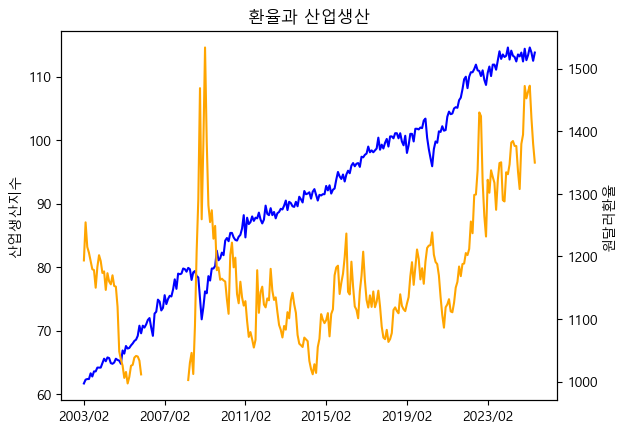

In [54]:
plt.rcParams['font.family'] = 'Malgun Gothic'
x = temp.index
y1 = temp['ipi']
y2 = temp['close']

fig, ax1 = plt.subplots()                # 첫 번째 y축
ax1.plot(x, y1, color='blue', label='y1')
ax1.set_ylabel('산업생산지수', color='black')

ax2 = ax1.twinx()                        # 두 번째 y축, x축은 공유
ax2.plot(x, y2, color='orange', label='y2')
ax2.set_ylabel('원달러환율', color='black')
plt.xticks(x[::48])
plt.title('환율과 산업생산')
plt.show()

In [25]:
#기본(평균)
x = sm.add_constant(temp['close'].pct_change())
y = temp['ipi']
reg = sm.OLS(y, x, missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    ipi   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6305
Date:                Tue, 19 Aug 2025   Prob (F-statistic):              0.428
Time:                        16:12:41   Log-Likelihood:                -1102.9
No. Observations:                 268   AIC:                             2210.
Df Residuals:                     266   BIC:                             2217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.4480      0.909     99.472      0.0

C:\Users\tmdal\AppData\Local\Temp\ipykernel_31300\677621852.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  x = sm.add_constant(temp['close'].pct_change())


In [58]:
#기본(평균)
x = sm.add_constant(np.log(temp['close']))
y = np.log(temp['ipi'])
reg = sm.OLS(y, x, missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    ipi   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     43.14
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           3.12e-10
Time:                        16:32:08   Log-Likelihood:                 106.03
No. Observations:                 242   AIC:                            -208.1
Df Residuals:                     240   BIC:                            -201.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8156      0.811     -1.006      0.3

In [28]:
temp['ipi_cycle'], temp['ipi_trend'] = sm.tsa.filters.cffilter(
    np.log(temp['ipi']), low=18, high=96, drift=True
    )

In [32]:
#기본(평균)
x = sm.add_constant(np.log(temp['close']))
y = temp['ipi_cycle']
reg = sm.OLS(y, x, missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              ipi_cycle   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.074
Date:                Tue, 19 Aug 2025   Prob (F-statistic):              0.151
Time:                        16:16:53   Log-Likelihood:                 674.19
No. Observations:                 242   AIC:                            -1344.
Df Residuals:                     240   BIC:                            -1337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1104      0.077      1.424      0.1

In [33]:
mu = temp['ipi'].mean()
std = temp['ipi'].std()
temp['ipi_z'] = (temp['ipi'] - mu) / std

In [35]:
mu_fx = temp['close'].mean()
std_fx = temp['close'].std()
temp['close_z'] = (temp['close']-mu_fx)/std_fx

In [42]:
# 월평균 환율과 전산업생산지수 z-score의 상관계수
temp[['ipi_z', 'avg_z']].corr()

,ipi_z,avg_z
ipi_z,1.000000,0.432071
avg_z,0.432071,1.000000


In [43]:
temp[['ipi_z', 'close_z']].corr()

,ipi_z,close_z
ipi_z,1.000000,0.431937
close_z,0.431937,1.000000


In [37]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2,avg,close,ipi_cycle,ipi_trend,ipi_z,avg_z,close_z
dates,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN,1191.95,1193.7,-0.003329,4.125613,-1.918017,0.193498,0.210291
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6,1236.66,1254.6,-0.001950,4.131627,-1.877867,0.620949,0.781650
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1,1230.54,1215.3,-0.000343,4.129340,-1.871175,0.562439,0.412940
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0,1199.66,1205.9,0.001379,4.125334,-1.871175,0.267210,0.324750
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9,1193.45,1193.0,0.003092,4.135656,-1.810950,0.207839,0.203723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,87.1,0.8,1445.58,1463.4,-0.011771,4.139671,1.541568,2.618334,2.740595
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,90.5,1.2,1457.92,1472.9,-0.012566,4.148708,1.621868,2.736311,2.829723
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7,-0.8,1441.92,1421.0,-0.013005,4.139857,1.568334,2.583343,2.342802


In [64]:
for i in np.arange(0,7,1):
    x = sm.add_constant(np.log(temp['close'])).shift(i)
    y = np.log(temp['ipi'])
    reg = sm.OLS(y, x, missing='drop').fit()
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')


lag: 0 
 r-square: 0.1523760174212898 
 rmse: 0.15677890225054086
lag: 1 
 r-square: 0.14646535797836568 
 rmse: 0.15646825817528823
lag: 2 
 r-square: 0.1424110115484709 
 rmse: 0.15606534815637366
lag: 3 
 r-square: 0.14041798138112804 
 rmse: 0.1553543040040224
lag: 4 
 r-square: 0.1389325586205361 
 rmse: 0.15457143268157164
lag: 5 
 r-square: 0.13888839107740192 
 rmse: 0.15374938686119496
lag: 6 
 r-square: 0.13488157592993588 
 rmse: 0.1532796760524203


In [65]:
def best_lag(a, b, max_lag=12):
    best = (0, a.corr(b))
    for lag in range(-max_lag, max_lag+1):
        if lag == 0:
            continue
        corr = a.corr(b.shift(lag))
        if pd.notna(corr) and corr > best[1]:
            best = (lag, corr)
    return best

In [66]:
l = ['close_z', 'avg_z']
for a in l:
    lag, lag_corr = best_lag(temp['ipi_z'], temp[a], max_lag=12)
    print(f"최고 교차상관: lag={lag}개월, corr={round(float(lag_corr),3)}")
    if lag > 0:
        print(f"해석: {a}가 약", lag, "개월 선행.")
    elif lag < 0:
        print("해석: 전산업생산지수가 약", abs(lag), "개월 선행.")
    else:
        print("해석: 유의미한 선행·후행이 크지 않음.")

최고 교차상관: lag=-12개월, corr=0.539
해석: 전산업생산지수가 약 12 개월 선행.
최고 교차상관: lag=-12개월, corr=0.542
해석: 전산업생산지수가 약 12 개월 선행.


In [67]:
temp

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2,avg,close,ipi_cycle,ipi_trend,ipi_z,avg_z,close_z
dates,,,,,,,,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN,1191.95,1193.7,-0.003329,4.125613,-1.918017,0.193498,0.210291
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6,1236.66,1254.6,-0.001950,4.131627,-1.877867,0.620949,0.781650
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1,1230.54,1215.3,-0.000343,4.129340,-1.871175,0.562439,0.412940
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0,1199.66,1205.9,0.001379,4.125334,-1.871175,0.267210,0.324750
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9,1193.45,1193.0,0.003092,4.135656,-1.810950,0.207839,0.203723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,87.1,0.8,1445.58,1463.4,-0.011771,4.139671,1.541568,2.618334,2.740595
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,90.5,1.2,1457.92,1472.9,-0.012566,4.148708,1.621868,2.736311,2.829723
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7,-0.8,1441.92,1421.0,-0.013005,4.139857,1.568334,2.583343,2.342802


In [81]:
temp.columns

Index(['ipi', '전산업', '제조업', '대기업', '중소기업', '중화학공업', '경공업', '수출기업', '내수기업',
       '비제조업', '서비스업', 'ipi_2', 'avg', 'close', 'ipi_cycle', 'ipi_trend',
       'ipi_z', 'avg_z', 'close_z', 'ipi_filtered', 'avg_filtered',
       'ipi_filtered_z', 'avg_filtered_z'],
      dtype='object')

In [82]:
import statsmodels.api as sm
temp['ipi_filtered'] = sm.tsa.filters.bkfilter(
    np.log(temp['ipi']),
    low=18,
    high=96,
    K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
)
temp['close_filtered'] = sm.tsa.filters.bkfilter(
    np.log(temp['close']),
    low=18,
    high=96,
    K=12  # K is the lead/lag length of the filter, 12 is common for monthly data
)

In [84]:
temp['close_filtered'].head(50)

dates
2003/02   NaN
2003/03   NaN
2003/04   NaN
2003/05   NaN
2003/06   NaN
2003/07   NaN
2003/08   NaN
2003/09   NaN
2003/10   NaN
2003/11   NaN
2003/12   NaN
2004/01   NaN
2004/02   NaN
2004/03   NaN
2004/04   NaN
2004/05   NaN
2004/06   NaN
2004/07   NaN
2004/08   NaN
2004/09   NaN
2004/10   NaN
2004/11   NaN
2004/12   NaN
2005/01   NaN
2005/02   NaN
2005/03   NaN
2005/04   NaN
2005/05   NaN
2005/06   NaN
2005/07   NaN
2005/08   NaN
2005/09   NaN
2005/10   NaN
2005/11   NaN
2005/12   NaN
2006/01   NaN
2006/02   NaN
2006/03   NaN
2006/04   NaN
2006/05   NaN
2006/06   NaN
2006/07   NaN
2006/08   NaN
2006/09   NaN
2006/10   NaN
2006/11   NaN
2006/12   NaN
2007/01   NaN
2007/02   NaN
2007/03   NaN
Name: close_filtered, dtype: float64

In [73]:
mu = temp['ipi_filtered'].mean()
std = temp['ipi_filtered'].std()

temp['ipi_filtered_z'] = (temp['ipi_filtered']-mu)/std

In [ ]:
mu = temp['close_filtered'].mean()
std = temp['avg_filtered'].std()

temp['avg_filtered_z'] = (temp['avg_filtered']-mu)/std

C:\Users\tmdal\AppData\Local\Temp\ipykernel_31300\3311933088.py:9: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.legend(); plt.tight_layout(); plt.show()


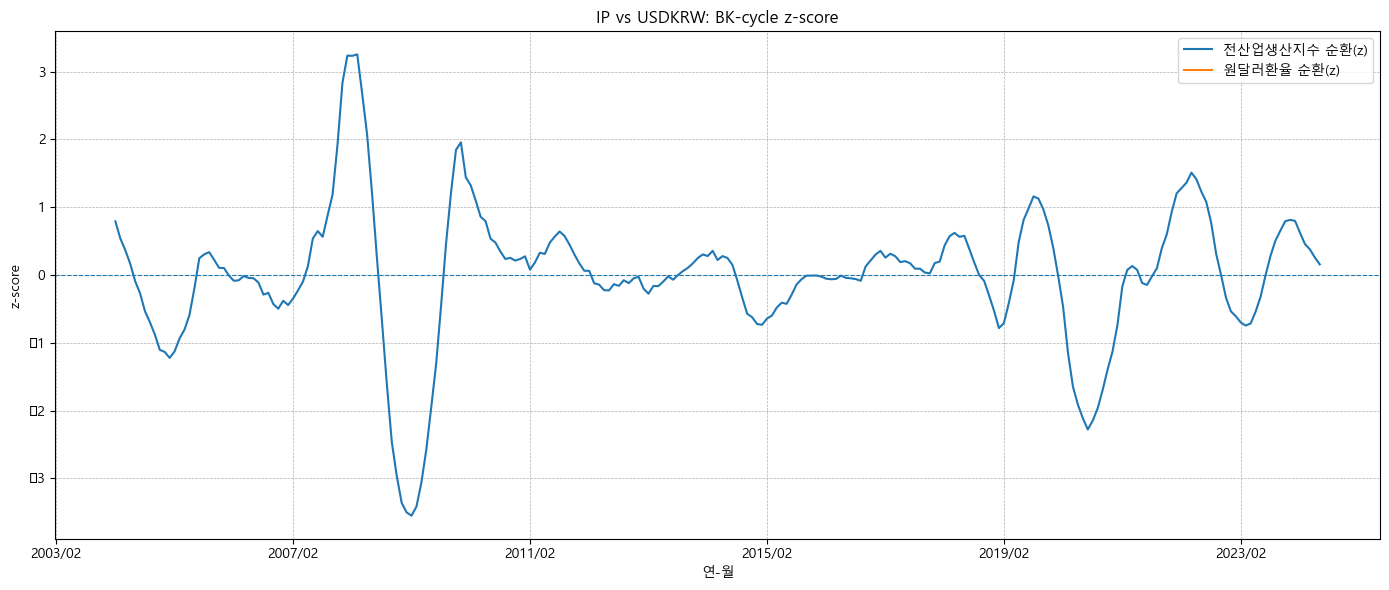

In [78]:
plt.figure(figsize=(14,6))
plt.plot(temp['ipi_filtered_z'].index, temp['ipi_filtered_z'].values, label='전산업생산지수 순환(z)')
plt.plot(temp['avg_filtered_z'].index, temp['avg_filtered_z'].values, label='원달러환율 순환(z)')
plt.axhline(0, linestyle='--', linewidth=0.8)
plt.title('IP vs USDKRW: BK-cycle z-score')
plt.xlabel('연-월'); plt.ylabel('z-score')
plt.xticks(temp['avg_filtered_z'].index[::48])
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(); plt.tight_layout(); plt.show()